<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>

# How to train YOLOv10

## Overview of YOLOv10
The YOLO (You Only Look Once) series has solidified its reputation as a premier choice for object detection, acclaimed for its remarkable speed and precision. With each successive version, the YOLO family consistently advances the field of computer vision, and YOLOv10 is no different in pushing these boundaries.

### 🌖 Release

Released in May 2024, only three months after YOLOv9, YOLOv10 is the latest iteration of the YOLO series, continuing its legacy while introducing significant innovations that set new benchmarks in object detection capabilities.



### 🌆 Architecture and innovations:

YOLOv10 builds upon the advancements made by YOLOv9 and introduces several key enhancements. Notably, YOLOv10 eliminates the need for non-maximum suppression (NMS) during inference, which reduces latency and enhances efficiency. This is achieved through a consistent dual assignment strategy that improves the training process by providing rich supervisory signals and aligning the training and inference stages more effectively.




### 📈 Accuracy and performance:

| Model | Test Size | #Params | FLOPs | AP<sup>val</sup> | Latency |
|:---------------|:----:|:---:|:--:|:--:|:--:|
| [YOLOv10-N](https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt) |   640  |     2.3M    |   6.7G   |     38.5%     | 1.84ms |
| [YOLOv10-S](https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt) |   640  |     7.2M    |   21.6G  |     46.3%     | 2.49ms |
| [YOLOv10-M](https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt) |   640  |     15.4M   |   59.1G  |     51.1%     | 4.74ms |
| [YOLOv10-B](https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt) |   640  |     19.1M   |  92.0G |     52.5%     | 5.74ms |
| [YOLOv10-L](https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt) |   640  |     24.4M   |  120.3G   |     53.2%     | 7.28ms |
| [YOLOv10-X](https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt) |   640  |     29.5M    |   160.4G   |     54.4%     | 10.70ms |

## Setup

Please use a GPU for this tutorial.

In the menu, select "Runtime" then "Change runtime type", choose GPU in "Hardware accelerator".

Check your GPU with the following command:

In [ ]:
!nvidia-smi

First of all, you need to install Ikomia API pip package.

In [ ]:
!pip install ikomia



---


**-Google Colab ONLY- Restart runtime**

Click on the "RESTART RUNTIME" button at the end the previous window.





---

Ikomia API has already more than 300 pre-integrated algorithms but the most interesting algorithms are in [Ikomia HUB](https://github.com/Ikomia-hub).


## How to train YOLOv10 on a custom dataset

Download your dataset from your preferred tool. In this example, we use a dataset from **Roboflow** which is a great annotation platform used by many developers and companies. The dataset is exported in COCO format.

In [1]:
import requests
import zipfile
import os


# Download the file
url = "https://public.roboflow.com/ds/MBBu5n6kDS?key=XY0rFMuMYS"
response = requests.get(url, stream=True)
with open("roboflow.zip", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Unzip the file
with zipfile.ZipFile("roboflow.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Remove the zip file
os.remove("roboflow.zip")


In order to train YOLOv10 on your custom dataset, please create a new workflow from scratch.

Then you need 2 components:

1.   A YOLO dataset loader which loads dataset in YOLO Darknet format and convert it to an Ikomia format
2.   The YOLOv10 training algorithm which loads dataset in Ikomia format

Add these 2 previous algorithms to your workflow and then it will automagically download all algorithms from Ikomia Hub and install all the Python dependencies (the 1st time, it can take a while, be patient ! ).

Now, it's time to train your model !

In [ ]:
from ikomia.dataprocess.workflow import Workflow
import os

#----------------------------- Step 1 -----------------------------------#
# Create a workflow which will take your dataset as input and
# train a YOLOv10 model on it
#------------------------------------------------------------------------#
wf = Workflow()

#----------------------------- Step 2 -----------------------------------#
# First you need to convert the YOLO format to IKOMIA format.
# Add an Ikomia dataset converter to your workflow.
#------------------------------------------------------------------------#

dataset = wf.add_task(name="dataset_yolo")

dataset.set_parameters({
        "dataset_folder":os.getcwd()+"/train",
        "class_file":os.getcwd()+"/train/_darknet.labels"
})

#----------------------------- Step 3 -----------------------------------#
# Then, you want to train a YOLOv10 model.
# Add YOLOv10 training algorithm to your workflow
#------------------------------------------------------------------------#
train = wf.add_task(name="train_yolo_v10", auto_connect=True)

train.set_parameters({
    "model_name":"yolov10s",
    "epochs":"50",
    "batch_size":"8",
    "input_size":"640",
    "dataset_split_ratio":"0.8",
    "output_folder":os.getcwd(),
})

#----------------------------- Step 4 -----------------------------------#
# Execute your workflow.
# It automatically runs all your tasks sequentially.
#------------------------------------------------------------------------#
wf.run()

## Infer YOLOv10 object detection on images

Once the training is finished, you may want to experiment the fresh model on new test images. Just use the following code to create a YOLO v8 instance
segmentation inference workflow.
Then run and test !

In [3]:
# Set the output folder name
TIMESTAMP = "20240531_092214"

In [ ]:
from ikomia.dataprocess.workflow import Workflow

# Create your workflow for YOLO inference
wf = Workflow()

# Add YOLOv10 instance segmentation to your workflow
yolov10 = wf.add_task(name="infer_yolo_v10", auto_connect=True)

yolov10.set_parameters({
    "model_weight_file": os.getcwd()+ f'/{TIMESTAMP}/train/weights/best.pt',
    "conf_thres": "0.5",
    "iou_thres":"0.25",
    "input_size":"640"
})

## Run and display your results


0: 640x640 1 black-king, 1 black-knight, 3 black-pawns, 1 black-queen, 1 black-rook, 1 white-king, 4 white-pawns, 2 white-rooks, 23.0ms
Speed: 3.4ms preprocess, 23.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Workflow Untitled run successfully in 40.223157 ms.


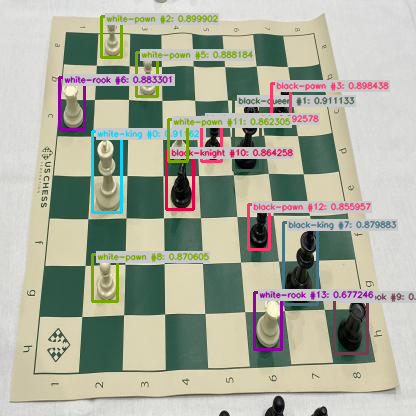

In [6]:
from ikomia.utils.displayIO import display
from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

# Apply YOLOv10 object detection on your image
# By default, YOLOv10 runs with a pre-trained model based on COCO
# To use your custom model, set the parameters in the previous cell
wf.run_on(path=os.getcwd()+"/test/e4583d082076b2b549b3736ad1b193c9_jpg.rf.c64d9d89f8d479bf811e6b355b93e90e.jpg")

# Get YOLOv10 image result
img_bbox = yolov10.get_image_with_graphics()

# Display in Colab
display(img_bbox)

## Run on video

This will work on local only, not on google colab

In [ ]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils.displayIO import display
import cv2


video_path = 'Path/to/your/video.mp4' # Example: https://www.youtube.com/watch?v=EAR5jTknVOw
output_path = 'output.mp4'
# Init your workflow
wf = Workflow()

# Add object detection algorithm
detector = wf.add_task(name="infer_yolo_v10", auto_connect=True)

detector.set_parameters({
    "model_weight_file": os.getcwd()+ f'/{TIMESTAMP}/weights/best.pt',
    "conf_thres": "0.2",
    "iou_thres":"0.25"
})

# Open the video file
stream = cv2.VideoCapture(video_path)
if not stream.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties for the output
frame_width = int(stream.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(stream.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = stream.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
# The 'XVID' codec is widely supported and provides good quality
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, frame_rate, (frame_width, frame_height))

while True:
    # Read image from stream
    ret, frame = stream.read()

    # Test if the video has ended or there is an error
    if not ret:
        print("Info: End of video or error.")
        break

    # Run the workflow on current frame
    wf.run_on(array=frame)

    # Get results
    image_out = detector.get_output(0)
    obj_detect_out = detector.get_output(1)

    # Convert the result to BGR color space for displaying
    img_out = image_out.get_image_with_mask_and_graphics(obj_detect_out)
    img_res = cv2.cvtColor(img_out, cv2.COLOR_RGB2BGR)

    # Save the resulting frame
    out.write(img_out)

    # Display
    display(img_res, title="YOLOv10 object detection", viewer="opencv")

    # Press 'q' to quit the video processing
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release everything
stream.release()
out.release()
cv2.destroyAllWindows()